**Exercise 1**

Implement a python function called central_limit_theorem that accepts three arguments: population_data, sample_size, and num_of_samples. Your function should simulate the central limit theorem. The function should draw the specified number of samples of the given size from the population data, calculate the means of these samples, and return a list of these means.

Test this function using a randomly generated population data. Plot the distribution of sample means and the mean of the population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implement your function here
def central_limit_theorem(population_data, sample_size, num_of_samples):
    sample_means = []
    for _ in range(num_of_samples):
        sample = np.random.choice(population_data, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means


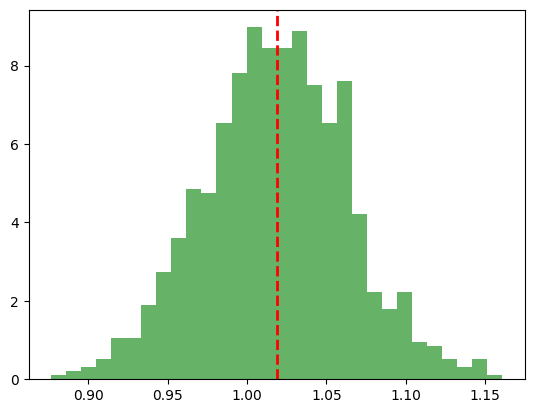

In [3]:
# Test the function

population_data = np.random.exponential(scale=1.0, size=10000)
sample_means = central_limit_theorem(population_data, sample_size=500, num_of_samples=1000)

# Plotting
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
plt.axvline(np.mean(population_data), color='r', linestyle='dashed', linewidth=2)
plt.show()


In [5]:
population_data

array([0.08715553, 2.33835203, 0.82673833, ..., 4.08427035, 0.47908637,
       2.16552727])

**Exercise 2**

Implement a python function called confidence_interval that accepts two arguments: data and confidence. Your function should calculate and return the confidence interval of population mean for the given data at the specified confidence level.

Test your function on a randomly generated data.

In [4]:
import numpy as np
import scipy.stats

In [5]:
def confidence_interval(data, confidence):
    mean = np.mean(data)
    sem = scipy.stats.sem(data)
    margin = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin

In [6]:
import numpy as np
import scipy.stats

# Implement your function here

# Test the function
data = np.random.normal(loc=10, scale=2, size=1000)
confidence = 0.95
conf_interval = confidence_interval(data, confidence)

print(f"The {confidence*100}% confidence interval is {conf_interval}")


The 95.0% confidence interval is (9.916134776557051, 10.159401742794955)


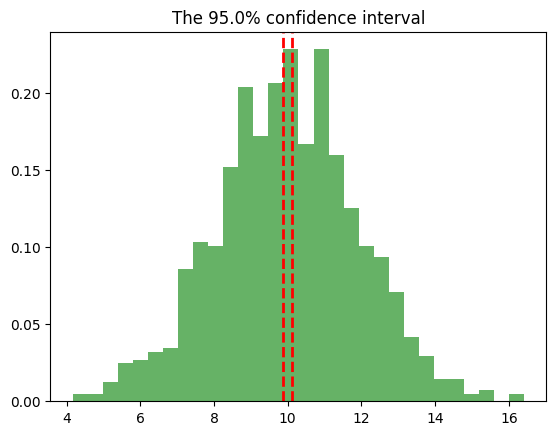

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval
def confidence_interval(data, confidence):
    mean = np.mean(data)
    sem = scipy.stats.sem(data)
    margin = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin

# Test the function
data = np.random.normal(loc=10, scale=2, size=1000)
confidence = 0.95
conf_interval = confidence_interval(data, confidence)

# Create histogram of data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Add lines for the confidence interval
plt.axvline(conf_interval[0], color='r', linestyle='dashed', linewidth=2)
plt.axvline(conf_interval[1], color='r', linestyle='dashed', linewidth=2)

# Show the plot
plt.title(f"The {confidence*100}% confidence interval")
plt.show()


 the two red lines are telling us that we are 95% confident (if your confidence = 0.95) that the true population mean falls between those two lines.

**Exercise 3**

How does the confidence interval of variance look like?

In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval for variance
def confidence_interval_variance(data, confidence):
    n = len(data)
    var = np.var(data, ddof=1)  # sample variance with Bessel's correction
    chi2_lower = scipy.stats.chi2.ppf((1 - confidence) / 2, df=n-1)
    chi2_upper = scipy.stats.chi2.ppf((1 + confidence) / 2, df=n-1)
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Calculate the confidence interval for the variance
confidence = 0.95
conf_interval_variance = confidence_interval_variance(data, confidence)
print(f"The {confidence*100}% confidence interval for variance is {conf_interval_variance}")


The 95.0% confidence interval for variance is (3.8152706969299923, 4.547102019161784)


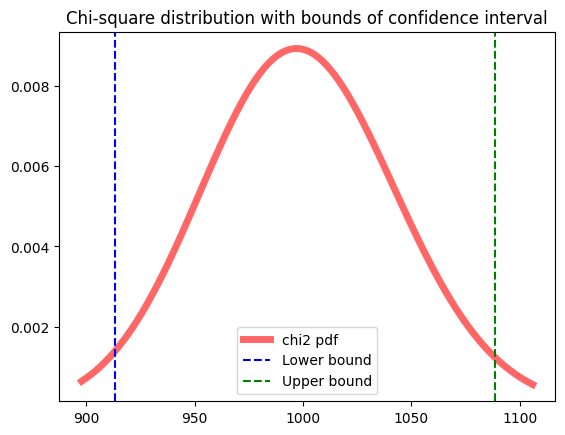

The 95.0% confidence interval for variance is (3.50, 4.17)


In [11]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval for variance
def confidence_interval_variance(data, confidence):
    n = len(data)
    var = np.var(data, ddof=1)  # sample variance with Bessel's correction
    chi2_lower = scipy.stats.chi2.ppf((1 - confidence) / 2, df=n-1)
    chi2_upper = scipy.stats.chi2.ppf((1 + confidence) / 2, df=n-1)
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper, chi2_lower, chi2_upper

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Calculate the confidence interval for the variance
confidence = 0.95
lower, upper, chi2_lower, chi2_upper = confidence_interval_variance(data, confidence)

# Plot chi-square distribution
df = len(data) - 1
x = np.linspace(scipy.stats.chi2.ppf(0.01, df), scipy.stats.chi2.ppf(0.99, df), 100)
plt.plot(x, scipy.stats.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

# Plot confidence intervals
plt.axvline(x=chi2_lower, color='blue', linestyle='--', label='Lower bound')
plt.axvline(x=chi2_upper, color='green', linestyle='--', label='Upper bound')

plt.title('Chi-square distribution with bounds of confidence interval')
plt.legend()
plt.show()

print(f"The {confidence*100}% confidence interval for variance is ({lower:.2f}, {upper:.2f})")


**Exercise 4**

Implement a python function called bootstrap that accepts three arguments: data, num_samples, and statistic. Your function should perform bootstrap sampling on the data (resampling with replacement) the specified number of times, applying the provided statistical function to each sample, and return an array of the calculated statistic for each sample.

Test this function using a randomly generated data and numpy's mean as the statistic. Calculate and print the mean and standard deviation of the bootstrap samples' statistic.

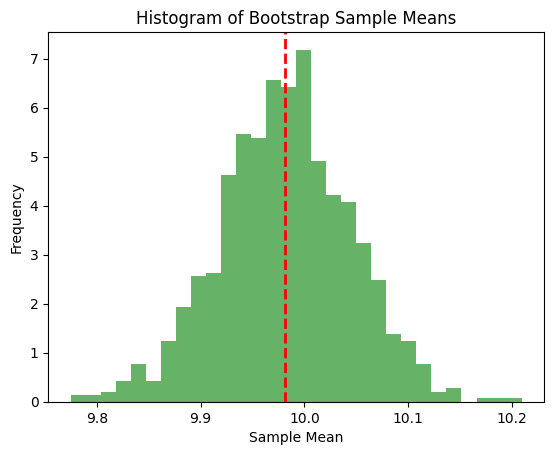

Bootstrap samples statistic mean: 9.98
Bootstrap samples statistic std dev: 0.06


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform bootstrap sampling
def bootstrap(data, num_samples, statistic):
    bootstrap_samples_stat = []
    for _ in range(num_samples):
        sample = np.random.choice(data, len(data), replace=True)
        bootstrap_samples_stat.append(statistic(sample))
    return np.array(bootstrap_samples_stat)

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Perform bootstrapping and calculate statistics for each sample
bootstrap_samples_stat = bootstrap(data, num_samples=1000, statistic=np.mean)

# Plot histogram of bootstrap sample statistics
plt.hist(bootstrap_samples_stat, bins=30, density=True, alpha=0.6, color='g')

# Add line for the mean of the bootstrap sample statistics
plt.axvline(np.mean(bootstrap_samples_stat), color='r', linestyle='dashed', linewidth=2)

# Show the plot
plt.title("Histogram of Bootstrap Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap samples statistic mean: {np.mean(bootstrap_samples_stat):.2f}")
print(f"Bootstrap samples statistic std dev: {np.std(bootstrap_samples_stat):.2f}")


### Exercise 
GreenGrow, an eco-friendly gardening supply company, wants to assess customer satisfaction with their new line of organic fertilizers. They've conducted a survey asking customers to rate their satisfaction on a scale of 1 to 10, with 10 being the highest satisfaction level.
Survey Results:

Number of respondents: 200
Mean satisfaction score: 7.8
Sample standard deviation: 1.5

#### Question:
As GreenGrow's data analyst, you've been asked to provide a 95% confidence interval for the true mean satisfaction score of all their customers. The marketing team will use this information to decide whether to expand the organic fertilizer line.

Calculate the 95% confidence interval for the true mean satisfaction score.
Interpret the results for the marketing team. What can you confidently say about the overall customer satisfaction?
The marketing team has set a benchmark: they will expand the product line if they are 95% confident that the true mean satisfaction score is above 7.5. Based on your calculation, what recommendation would you give to the team?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# GreenGrow survey data
sample_mean = 7.8
sample_std = 1.5
sample_size = 200
confidence_level = 0.95

# Calculate confidence interval
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (7.59, 8.01)


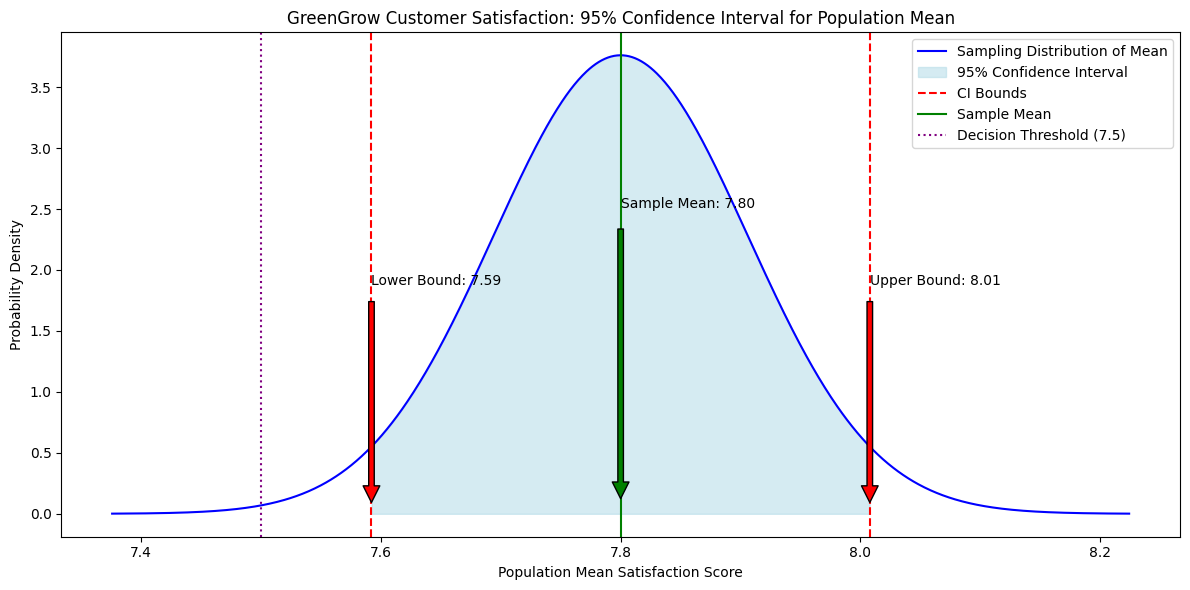

In [11]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Create a range of x values for the sampling distribution of the mean
x = np.linspace(sample_mean - 4*sample_std/np.sqrt(sample_size), 
                sample_mean + 4*sample_std/np.sqrt(sample_size), 1000)
y = stats.norm.pdf(x, sample_mean, sample_std/np.sqrt(sample_size))

# Plot the sampling distribution curve
ax.plot(x, y, 'b-', label='Sampling Distribution of Mean')

# Fill the area within the confidence interval
ax.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color='lightblue', alpha=0.5, label='95% Confidence Interval')

# Add vertical lines for the confidence interval bounds
ax.axvline(ci_lower, color='r', linestyle='--', label='CI Bounds')
ax.axvline(ci_upper, color='r', linestyle='--')

# Add a vertical line for the sample mean
ax.axvline(sample_mean, color='g', linestyle='-', label='Sample Mean')

# Add a vertical line for the decision threshold
decision_threshold = 7.5
ax.axvline(decision_threshold, color='purple', linestyle=':', label='Decision Threshold (7.5)')

# Customize the plot
ax.set_title('GreenGrow Customer Satisfaction: 95% Confidence Interval for Population Mean')
ax.set_xlabel('Population Mean Satisfaction Score')
ax.set_ylabel('Probability Density')
ax.legend()

# Add annotations
ax.annotate(f'Lower Bound: {ci_lower:.2f}', xy=(ci_lower, 0), xytext=(ci_lower, max(y)/2),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate(f'Upper Bound: {ci_upper:.2f}', xy=(ci_upper, 0), xytext=(ci_upper, max(y)/2),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate(f'Sample Mean: {sample_mean:.2f}', xy=(sample_mean, 0), xytext=(sample_mean, max(y)/1.5),
            arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()

In [12]:
# Interpretation
print("\nInterpretation:")
print(f"We are 95% confident that the true population mean satisfaction score falls between {ci_lower:.2f} and {ci_upper:.2f}.")
if ci_lower > decision_threshold:
    print("Recommendation: Expand the product line. We are 95% confident that the true population mean satisfaction score is above 7.5.")
elif ci_upper < decision_threshold:
    print("Recommendation: Do not expand the product line. We are 95% confident that the true population mean satisfaction score is below 7.5.")
else:
    print("Recommendation: Consider gathering more data. The decision threshold falls within the confidence interval, so we cannot be 95% confident about whether the true population mean is above or below 7.5.")


Interpretation:
We are 95% confident that the true population mean satisfaction score falls between 7.59 and 8.01.
Recommendation: Expand the product line. We are 95% confident that the true population mean satisfaction score is above 7.5.
